**Generator**

In [11]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Reshape,Flatten


In [7]:
generator= Sequential()
generator.add(Dense(128, activation="relu", input_shape=(100,)))
generator.add(BatchNormalization())

kernel_size=128
for i in range(3):
  kernel_size= kernel_size*2
  generator.add(Dense(kernel_size, activation="relu"))
  generator.add(BatchNormalization())
  

generator.add(Dense(28*28*1, activation="relu"))
generator.add(Reshape((28,28,1)))

In [8]:
generator.compile(loss="binary_crossentropy", optimizer= "adam")

In [9]:
generator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               12928     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
dense_15 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
dense_16 (Dense)             (None, 512)               131584    
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dense_17 (Dense)             (None, 1024)             

**Discriminator**

In [12]:
discriminator= Sequential()
discriminator.add(Flatten(input_shape=(28,28,1)))
discriminator.add(Dense(1024, activation="relu", input_shape=(28*28*1, )))
discriminator.add(Dense(512, activation="relu"))
discriminator.add(Dense(256, activation="relu"))
discriminator.add(Dense(128, activation="relu"))

discriminator.add(Dense(1, activation="sigmoid"))

In [13]:
discriminator.compile(loss="binary_crossentropy", optimizer= "adam")

In [14]:
discriminator.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 1,492,993
Trainable params: 1,492,993
Non-trainable params: 0
____________________________________________

**Adversial (GAN) Networks**

In [21]:
gan= Sequential()
discriminator.trainable= False
generator.trainable= True
gan.add(generator)
gan.add(discriminator)

In [18]:
gan.compile(loss='binary_crossentropy', optimizer="adam")

In [19]:
gan.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 28, 28, 1)         1514128   
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 1492993   
Total params: 3,007,121
Trainable params: 1,510,288
Non-trainable params: 1,496,833
_________________________________________________________________


**LOAD MNIST**

In [38]:
import keras
import numpy as np
from keras.datasets import mnist

In [39]:
model_type = -1
def load_MNIST(model_type):

    allowed_types = [-1,0,1,2,3,4,5,6,7,8,9]

    if model_type not in allowed_types:
        print('ERROR: Only Integer Values from -1 to 9 are allowed')

    (X_train, Y_train), (_, _) = mnist.load_data()
    
    xxx = X_train
#     print("X_train: ", X_train.shape)
    if model_type!=-1:
        X_train = X_train[np.where(Y_train==int(model_type)) [0]]
        print("X_train: ", X_train.shape)

    X_train = ( np.float32(X_train) - 127.5) / 127.5
#     X_train = np.expand_dims(X_train, axis=3)
    
    return X_train, Y_train, xxx

In [26]:
pip install mnist

In [40]:
X_train, Y_train, xxx = load_MNIST(model_type=3)

X_train:  (6131, 28, 28)


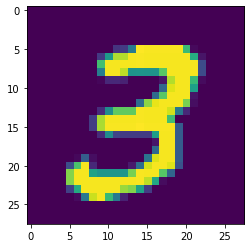

In [42]:
import matplotlib.pyplot as plt 
img = plt.imshow(X_train[0])

**Grab a batch**

In [43]:
from random import randint

# Grab a batch
count_real_images = int(32/2)
starting_index = randint(0, (len(X_train) - count_real_images ))
starting_index

4688

In [44]:
real_images_raw = X_train[starting_index : (starting_index + count_real_images)]
real_images_raw.shape

(16, 28, 28)

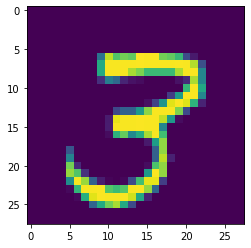

In [45]:
img = plt.imshow(real_images_raw[0])

In [46]:
x_real_images = real_images_raw.reshape(count_real_images, 28, 28, 1)
x_real_images.shape

(16, 28, 28, 1)

In [47]:
y_real_lebels = np.ones([count_real_images, 1])
y_real_lebels.shape

(16, 1)

**Grab Generated Images for this training batch**

In [48]:
LATENT_SPACE_SIZE = 100
def sample_latent_space(instances):
        return np.random.normal(0, 1, (instances, LATENT_SPACE_SIZE))

In [49]:
# Grab Generated Images for this training batch
latent_space_samples = sample_latent_space(count_real_images)
latent_space_samples.shape

(16, 100)

In [50]:
x_generated_images = generator.predict(latent_space_samples)

In [51]:
y_generated_labels = np.zeros([32-count_real_images,1])
y_generated_labels.shape

(16, 1)

In [52]:
print(y_generated_labels[0], y_real_lebels[0])

[0.] [1.]


In [53]:
# Combine to train on the discriminator
x_batch = np.concatenate( [x_real_images, x_generated_images] )
y_batch = np.concatenate( [y_real_lebels, y_generated_labels] )

**Train Adversarial Net**

In [54]:

# Now, train the discriminator with this batch
discriminator_loss = discriminator.train_on_batch(x_batch,y_batch)
print("ok")

ok


In [55]:
# Generate Noise
x_latent_space_samples = sample_latent_space(32)
y_generated_labels = np.ones([32,1])
y_generated_labels.shape

(32, 1)

In [57]:
gan.compile(loss='binary_crossentropy', optimizer="adam")

In [58]:
generator_loss = gan.train_on_batch(x_latent_space_samples, y_generated_labels)

In [59]:
print ('Epoch: '+str(int(1))+', [Discriminator :: Loss:'+str(discriminator_loss)+'], [ Generator :: Loss:'+str(generator_loss)+']')

Epoch: 1, [Discriminator :: Loss:0.7271832823753357], [ Generator :: Loss:0.9174883365631104]
